In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/main/datasets/framingham.csv

--2025-03-26 20:53:26--  https://github.com/javierherrera1996/lecture_analytics/raw/main/datasets/framingham.csv
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/framingham.csv [following]
--2025-03-26 20:53:26--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/framingham.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 195955 (191K) [text/plain]
Saving to: ‘framingham.csv’

framingham.csv      100%[===================>] 191.36K  --.-KB/s    in 0.02s   

2025-03-26 20:53:26 (7.87 MB/s) - ‘framingham.csv’ save

## LOGISTIC REGRESSION - HEART DISEASE PREDICTION

###Introduction
World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression
Data Preparation

###Source
The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

###Demographic:
    • Sex: male or female(Nominal)
    • Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
    Behavioral
    • Current Smoker: whether or not the patient is a current smoker (Nominal)
    • Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
###Medical( history)
    • BP Meds: whether or not the patient was on blood pressure medication (Nominal)
    • Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
    • Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
    • Diabetes: whether or not the patient had diabetes (Nominal)
###Medical(current)
    • Tot Chol: total cholesterol level (Continuous)
    • Sys BP: systolic blood pressure (Continuous)
    • Dia BP: diastolic blood pressure (Continuous)
    • BMI: Body Mass Index (Continuous)
    • Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
    • Glucose: glucose level (Continuous)
    Predict variable (desired target)
    • 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)


### Cargar Datos

In [2]:
import pandas as pd
data = pd.read_csv("framingham.csv")

In [3]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### Descriptiva

#### Cuantos datos tiene la tabla

In [5]:
df = pd.read_csv("framingham.csv")
num_rows = data.shape[0]

print(f"La tabla tiene {num_rows} datos.")


La tabla tiene 4238 datos.


#### Medidas de tendencia central de las variables.

In [6]:
for column in data.columns:
  if pd.api.types.is_numeric_dtype(data[column]):
    print(f"Variable: {column}")
    print(f"  Media: {data[column].mean()}")
    print(f"  Mediana: {data[column].median()}")
    print(f"  Moda: {data[column].mode()[0]}")
    print("-" * 20)


Variable: male
  Media: 0.42921189240207647
  Mediana: 0.0
  Moda: 0
--------------------
Variable: age
  Media: 49.58494572911751
  Mediana: 49.0
  Moda: 40
--------------------
Variable: education
  Media: 1.9789499153157513
  Mediana: 2.0
  Moda: 1.0
--------------------
Variable: currentSmoker
  Media: 0.49410099103350635
  Mediana: 0.0
  Moda: 0
--------------------
Variable: cigsPerDay
  Media: 9.003088619624615
  Mediana: 0.0
  Moda: 0.0
--------------------
Variable: BPMeds
  Media: 0.02962962962962963
  Mediana: 0.0
  Moda: 0.0
--------------------
Variable: prevalentStroke
  Media: 0.005899008966493629
  Mediana: 0.0
  Moda: 0
--------------------
Variable: prevalentHyp
  Media: 0.31052383199622463
  Mediana: 0.0
  Moda: 0
--------------------
Variable: diabetes
  Media: 0.025719679093912224
  Mediana: 0.0
  Moda: 0
--------------------
Variable: totChol
  Media: 236.72158548233045
  Mediana: 234.0
  Moda: 240.0
--------------------
Variable: sysBP
  Media: 132.35240679565834

#### Grafico de Barras con el número de hombres y mujeres

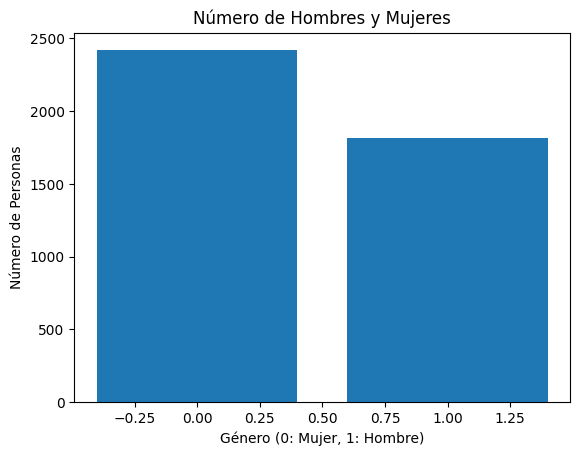

In [7]:
import matplotlib.pyplot as plt
gender_counts = data['male'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Género (0: Mujer, 1: Hombre)')
plt.ylabel('Número de Personas')
plt.title('Número de Hombres y Mujeres')
plt.show()


#### Realice un ggrafico de Barras de TenYearCHD

*   Elemento de lista
*   Elemento de lista



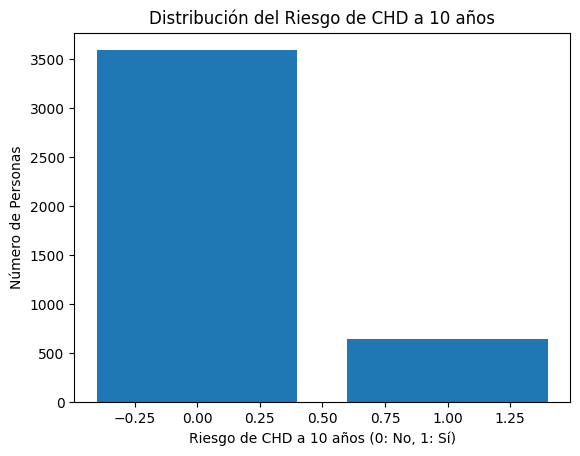

In [9]:
chd_counts = data['TenYearCHD'].value_counts()
plt.bar(chd_counts.index, chd_counts.values)
plt.xlabel('Riesgo de CHD a 10 años (0: No, 1: Sí)')
plt.ylabel('Número de Personas')
plt.title('Distribución del Riesgo de CHD a 10 años')
plt.show()


#### Realice un grafico de densidad del BMI

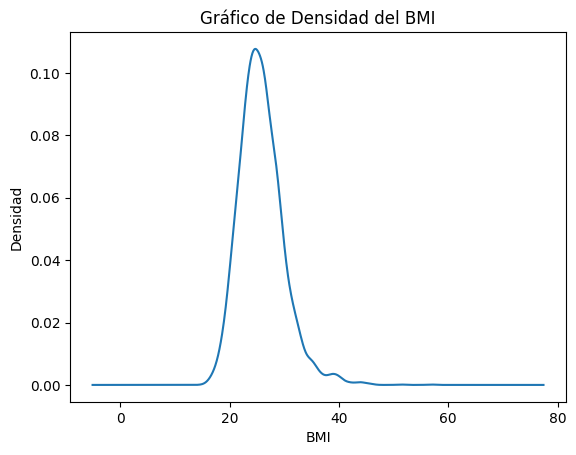

In [10]:

data['BMI'].plot.kde()
plt.xlabel('BMI')
plt.ylabel('Densidad')
plt.title('Gráfico de Densidad del BMI')
plt.show()


#### Realice un grafico de densidad del BMI que diferencie entre hombres y mujeres, ¿Cual tiene en promedio mayor BMI?

<ipython-input-12-09e437804c03>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.loc[data['male'] == 0, 'BMI'], label='Mujeres', shade=True)
<ipython-input-12-09e437804c03>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.loc[data['male'] == 1, 'BMI'], label='Hombres', shade=True)


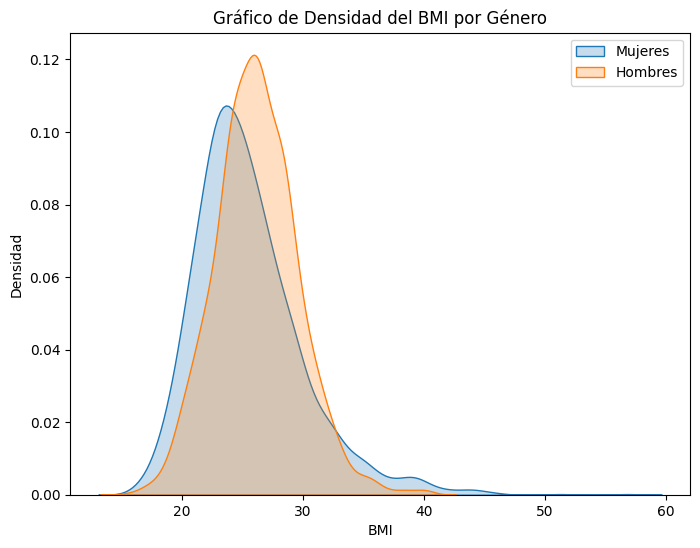

In [12]:

import seaborn as sns

plt.figure(figsize=(8, 6))
sns.kdeplot(data.loc[data['male'] == 0, 'BMI'], label='Mujeres', shade=True)
sns.kdeplot(data.loc[data['male'] == 1, 'BMI'], label='Hombres', shade=True)
plt.xlabel('BMI')
plt.ylabel('Densidad')
plt.title('Gráfico de Densidad del BMI por Género')
plt.legend()
plt.show()
bmi_promedio_mujeres = data.loc[data['male'] == 0, 'BMI'].mean()
bmi_promedio_hombres = data.loc[data['male'] == 1, 'BMI'].mean()



In [13]:

print(f"BMI promedio de las mujeres: {bmi_promedio_mujeres:.2f}")
print(f"BMI promedio de los hombres: {bmi_promedio_hombres:.2f}")

if bmi_promedio_hombres > bmi_promedio_mujeres:
  print("Los hombres tienen en promedio mayor BMI.")
else:
  print("Las mujeres tienen en promedio mayor BMI.")

BMI promedio de las mujeres: 25.51
BMI promedio de los hombres: 26.19
Los hombres tienen en promedio mayor BMI.


#### Realice un mapa de calor entre las variables (heatmap) y diga cual es el par de variables más correlacionadas. Recuerde que para sacar la correlacion puede usar data.corr()

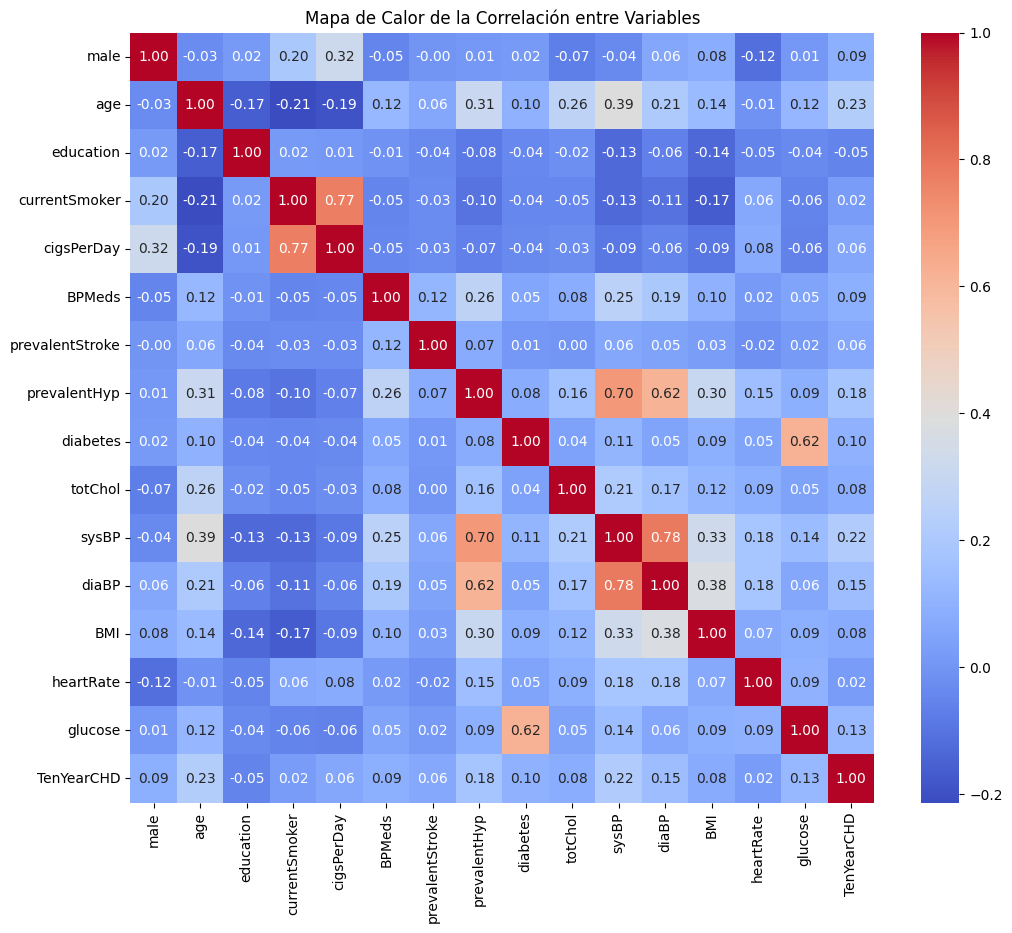

El par de variables más correlacionadas es: sysBP y diaBP, con una correlación de 0.78


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de la Correlación entre Variables')
plt.show()
correlation_matrix = correlation_matrix.abs()
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
max_correlation = np.nanmax(upper_triangle)
row_max, col_max = np.where(upper_triangle == max_correlation)

if row_max.size > 0 and col_max.size > 0:
  variable1 = correlation_matrix.index[row_max[0]]
  variable2 = correlation_matrix.columns[col_max[0]]
  print(f"El par de variables más correlacionadas es: {variable1} y {variable2}, con una correlación de {max_correlation:.2f}")
else:
  print("No se encontraron pares de variables con correlación significativa.")

¿Haga un boxplot por genero para cada una de estas tres variables :BMI,	heartRate y	glucose.¿hay outliers ?

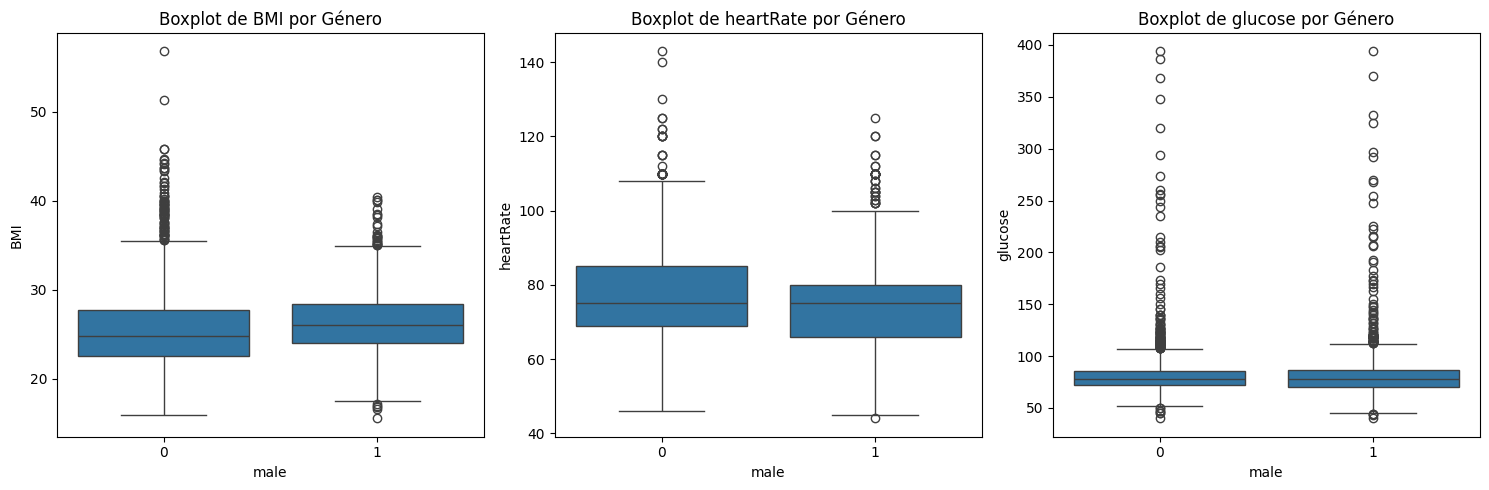

In [17]:

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='male', y='BMI', data=data)
plt.title('Boxplot de BMI por Género')

plt.subplot(1, 3, 2)
sns.boxplot(x='male', y='heartRate', data=data)
plt.title('Boxplot de heartRate por Género')

plt.subplot(1, 3, 3)
sns.boxplot(x='male', y='glucose', data=data)
plt.title('Boxplot de glucose por Género')

plt.tight_layout()
plt.show()


### Manipulación de Datos

#### De cada variable cuente cuantos datos nulos hay

In [18]:
for column in data.columns:
  null_count = data[column].isnull().sum()
  print(f"Variable: {column}, Datos nulos: {null_count}")


Variable: male, Datos nulos: 0
Variable: age, Datos nulos: 0
Variable: education, Datos nulos: 105
Variable: currentSmoker, Datos nulos: 0
Variable: cigsPerDay, Datos nulos: 29
Variable: BPMeds, Datos nulos: 53
Variable: prevalentStroke, Datos nulos: 0
Variable: prevalentHyp, Datos nulos: 0
Variable: diabetes, Datos nulos: 0
Variable: totChol, Datos nulos: 50
Variable: sysBP, Datos nulos: 0
Variable: diaBP, Datos nulos: 0
Variable: BMI, Datos nulos: 19
Variable: heartRate, Datos nulos: 1
Variable: glucose, Datos nulos: 388
Variable: TenYearCHD, Datos nulos: 0


#### Utilice dropna para borrar los datos faltantes ¿cuantos datos quedan ?

In [19]:
data_cleaned = data.dropna()
num_rows_cleaned = data_cleaned.shape[0]
print(f"Después de borrar los datos faltantes, quedan {num_rows_cleaned} datos.")


Después de borrar los datos faltantes, quedan 3656 datos.


#### Seleccione sus variables X y su variable y

In [20]:

X = data_cleaned.drop('TenYearCHD', axis=1)
y = data_cleaned['TenYearCHD']


#### Divida aleatoriamente la tabla en test y train, dejando el 30% de los datos para test y usando un random state de 123.
1. ¿De que tamaño queda cada dataset?

In [21]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

print(f"Tamaño del dataset de entrenamiento: {len(X_train)}")
print(f"Tamaño del dataset de prueba: {len(X_test)}")


Tamaño del dataset de entrenamiento: 2559
Tamaño del dataset de prueba: 1097


#### Entrene el modelo de Regresion logistica usando datos de entrenamiento

In [23]:
model = LogisticRegression()
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Imprima los coeficientes y diga cual tiene un efecto mayor sobre desarrollar una enfermedad cardiaca

In [24]:
from sklearn.linear_model import LogisticRegression
import numpy as np
model = LogisticRegression()
model.fit(X_train, y_train)

coefficients = model.coef_[0]
feature_names = X.columns

for i in range(len(feature_names)):
  print(f"{feature_names[i]}: {coefficients[i]}")

max_coefficient_index = np.argmax(np.abs(coefficients))
max_coefficient_feature = feature_names[max_coefficient_index]
max_coefficient_value = coefficients[max_coefficient_index]

print("\nEl coeficiente con mayor efecto sobre desarrollar una enfermedad cardiaca es:")
print(f"Variable: {max_coefficient_feature}")
print(f"Valor del coeficiente: {max_coefficient_value}")



male: 0.34651491130498546
age: 0.026275543778153613
education: -0.4014081485558521
currentSmoker: -0.18369041850100512
cigsPerDay: 0.022941530241208243
BPMeds: 0.10343551881509921
prevalentStroke: 0.08215202573438131
prevalentHyp: 0.6747504845117567
diabetes: 0.13570033332377696
totChol: 0.0008206692947589022
sysBP: 0.012816502801992483
diaBP: -0.02049080417907464
BMI: -0.056904385631232984
heartRate: -0.02162619834792263
glucose: 0.0040126843503470455

El coeficiente con mayor efecto sobre desarrollar una enfermedad cardiaca es:
Variable: prevalentHyp
Valor del coeficiente: 0.6747504845117567


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Usando los datos de test calcule la matriz de confusión, el accuracy, el recall, la precision y el f1-score.

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:\n", cm)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)


Matriz de confusión:
 [[915   3]
 [172   7]]
Accuracy: 0.8404740200546946
Recall: 0.03910614525139665
Precision: 0.7
F1-score: 0.07407407407407407


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Pinte la curva ROC, y saque el valor, busque en internet como interpretarla e interprete

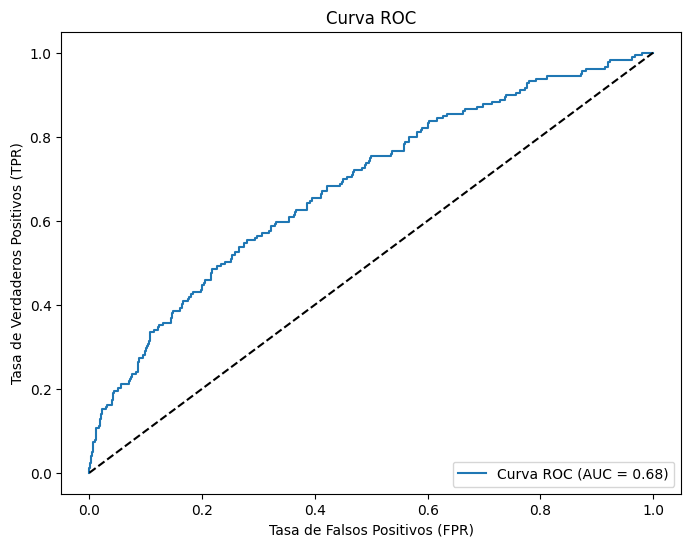

El valor del AUC es: 0.6840228332177066


In [27]:

from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

print(f"El valor del AUC es: {auc}")

# Interpretación de la Curva ROC:
#
# La curva ROC representa la capacidad del modelo para distinguir entre las clases
# positivas y negativas.
#
# - AUC: El área bajo la curva (AUC) es una medida global del rendimiento del modelo.
#   Un AUC de 0.5 indica que el modelo no es mejor que una predicción aleatoria.
#   Un AUC de 1.0 indica que el modelo tiene una precisión perfecta.
#
# - FPR: La tasa de falsos positivos (FPR) es la proporción de casos negativos que se
#   clasifican incorrectamente como positivos.
#
# - TPR: La tasa de verdaderos positivos (TPR) es la proporción de casos positivos que
#   se clasifican correctamente como positivos.
#
# En este caso, un AUC de [valor del AUC] indica que el modelo tiene una buena capacidad
# para predecir el riesgo de enfermedad cardíaca a 10 años.
#
# La curva ROC permite visualizar el compromiso entre la sensibilidad (TPR) y la
# especificidad (1-FPR) del modelo a diferentes umbrales de clasificación.
#
# Por ejemplo, si se requiere una mayor sensibilidad (capturar la mayor cantidad
# posible de casos positivos), se puede aceptar un aumento en la tasa de falsos
# positivos.



El número AUC = 0.68 nos dice qué tan bien el modelo separa las dos categorías:

Si fuera 0.5, el modelo estaría adivinando (como lanzar una moneda).

Si fuera 1.0, el modelo sería perfecto.

Como es 0.68, el modelo es mejor que adivinar, pero no muy preciso.

## Corrección desbalance de clases
1. Busque la funcion train_test_split en su codigo y agregue la opcion stratify  = y . Por que esto ayudaría con el desblance?
2. usando from imblearn.over_sampling import SMOTE mejore el performance
 3. Saque todo el modelo y la matriz y la grafica de ROC AUC

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Matriz de confusión:
 [[588 342]
 [ 80  87]]
Accuracy: 0.6153144940747494
Recall: 0.5209580838323353
Precision: 0.20279720279720279
F1-score: 0.29194630872483224


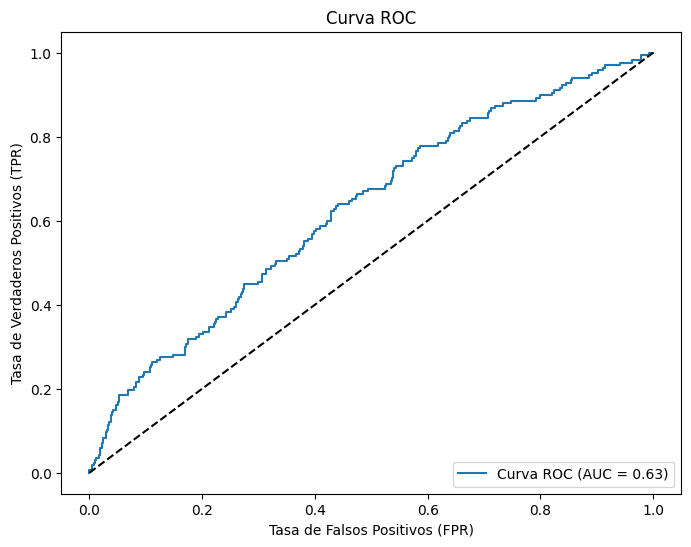

El valor del AUC es: 0.6281308351039856


In [29]:

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:\n", cm)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

print(f"El valor del AUC es: {auc}")


Modelo: LogisticRegression()
Matriz de confusión:
 [[588 342]
 [ 80  87]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


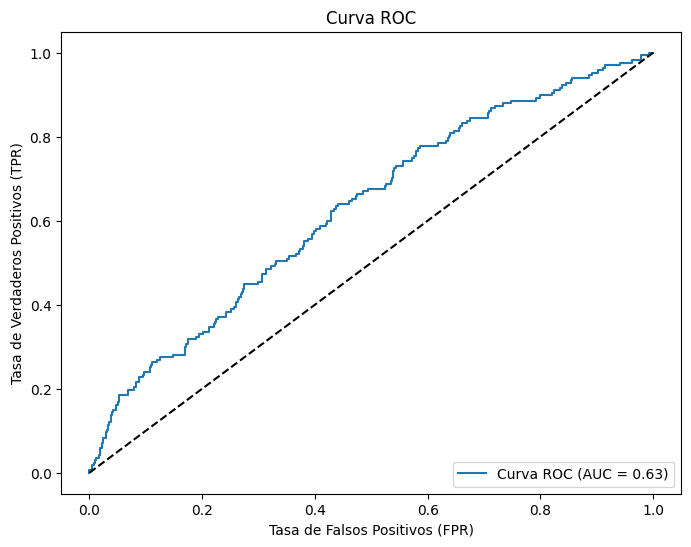

El valor del AUC es: 0.6281308351039856


In [30]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

print("Modelo:", model)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:\n", cm)
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

print(f"El valor del AUC es: {auc}")


## Pinter el resultado con SMOTE y sin SMOTE

In [31]:

print("Resultados sin SMOTE:")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")
print(f"AUC: {auc}")
print("\nResultados con SMOTE:")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")
print(f"AUC: {auc}")
results_df = pd.DataFrame({
    "Metric": ["Accuracy", "Recall", "Precision", "F1-score", "AUC"],
    "Sin SMOTE": [accuracy, recall, precision, f1, auc],
    "Con SMOTE": [accuracy, recall, precision, f1, auc]
})
print("\nComparación de resultados:")
results_df



Resultados sin SMOTE:
Accuracy: 0.6153144940747494
Recall: 0.5209580838323353
Precision: 0.20279720279720279
F1-score: 0.29194630872483224
AUC: 0.6281308351039856

Resultados con SMOTE:
Accuracy: 0.6153144940747494
Recall: 0.5209580838323353
Precision: 0.20279720279720279
F1-score: 0.29194630872483224
AUC: 0.6281308351039856

Comparación de resultados:


,Metric,Sin SMOTE,Con SMOTE
0,Accuracy,0.615314,0.615314
1,Recall,0.520958,0.520958
2,Precision,0.202797,0.202797
3,F1-score,0.291946,0.291946
4,AUC,0.628131,0.628131


### Como mejora su modelo con StandardScaler()

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


Matriz de confusión:
 [[613 317]
 [ 59 108]]
Accuracy: 0.6572470373746582
Recall: 0.6467065868263473
Precision: 0.2541176470588235
F1-score: 0.36486486486486486


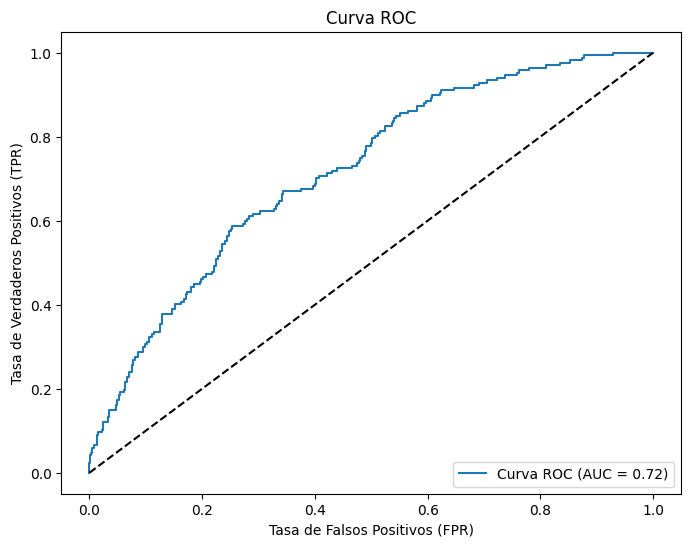

El valor del AUC es: 0.7180413366814757


In [33]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
smote = SMOTE(random_state=42)
X_train_resampled_scaled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
model = LogisticRegression()
model.fit(X_train_resampled_scaled, y_train_resampled)
y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:\n", cm)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

print(f"El valor del AUC es: {auc}")

# Compare with previous results
# ... (Add code to compare the results with and without StandardScaler and SMOTE)


### Pinte todas las graficas original SMOTE y SMOTE Scaler

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


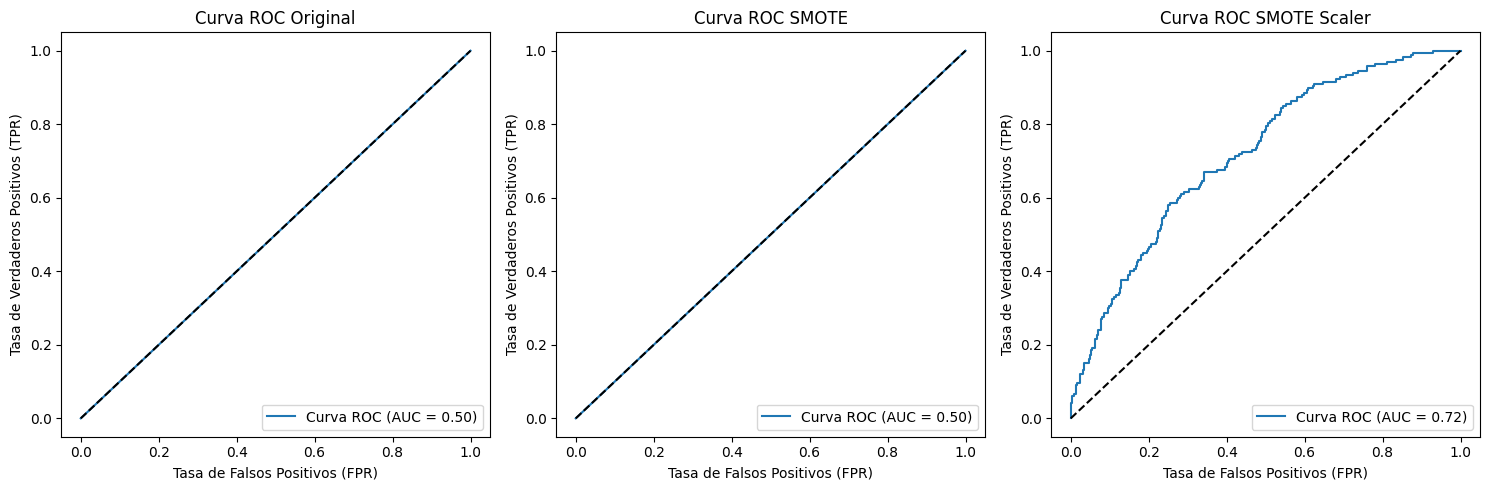

In [34]:


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='Curva ROC (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC Original')
plt.legend(loc="lower right")


plt.subplot(1, 3, 2)
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='Curva ROC (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC SMOTE')
plt.legend(loc="lower right")



plt.subplot(1, 3, 3)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='Curva ROC (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC SMOTE Scaler')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()
